# Decision Tree

Decision Tree adalah sebuah model prediktif berbentuk struktur pohon yang digunakan untuk proses pengambilan keputusan, di mana setiap node internal mewakili suatu atribut atau fitur, setiap cabang mewakili kondisi atau hasil dari pengujian atribut tersebut, dan setiap daun (leaf node) mewakili hasil keputusan atau kelas target.

## Langkah-Langkah Menggunakan Algoritma Decision Tree


a) *Menghitung Entropy**

Entropy adalah ukuran ketidakpastian atau ketidakteraturan dalam data. Semakin tinggi entropy, semakin tidak murni data tersebut (bercampur antara kelas-kelas berbeda).

Rumus:

$$
Entropy(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)
$$

**Keterangan:**

- $( S $): Dataset
- $( c $): Jumlah kelas
- $( p_i $): Proporsi kelas ke-\( i \)


b) **Split Entropy**

Split entropy adalah rata-rata nilai entropi dari subset data hasil pemisahan berdasarkan suatu atribut dan threshold. Ini digunakan untuk menghitung seberapa "bersih" hasil split. Semakin rendah nilai split entropy, semakin baik hasil pemisahan data tersebut.

Rumus:

$[
Entropy_{split}(S, A, t) = \frac{|S_{left}|}{|S|} \cdot Entropy(S_{left}) + \frac{|S_{right}|}{|S|} \cdot Entropy(S_{right})
$]

**Keterangan:**

- $( S $) : Dataset
- $( A $) : Atribut (fitur) yang digunakan untuk split
- $( t $) : Threshold (nilai batas pemisahan)
- $( c $) : Jumlah kelas dalam dataset
- $( p_i $) : Proporsi data dari kelas ke-$( i $) dalam suatu subset
- $( S_{$text{left}} $) : Subset data dengan nilai $( A $leq t $)

- $( S_{$text{right}} $) : Subset data dengan nilai $( A > t $)
- $( |S| $) : Jumlah total data
- $( |S_{$text{left}}| $) : Jumlah data di subset kiri
- $( |S_{$text{right}}| $) : Jumlah data di subset kanan
- $( Entropy(S) $) : Entropi dari dataset $( S $)
- $( Entropy_{split} $) : Entropi setelah pemisahan data berdasarkan threshold $( t $)
- $( Gain(S, A, t) $) : Information Gain dari atribut $( A $) pada threshold $( t $)


c) **Information Gain**

Information Gain adalah ukuran pengurangan ketidakpastian (entropy) yang diperoleh setelah suatu dataset dibagi berdasarkan atribut tertentu. Semakin besar nilai Information Gain, semakin baik atribut tersebut dalam memisahkan data menurut kelas targetnya.

Rumus:
$$
Gain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} \cdot Entropy(S_v)
$$

**Keterangan:**
- $( S $): Dataset induk
- $( A $): Atribut yang diuji
- $( Values(A) $): Nilai-nilai unik dari atribut \( A \)
- $( S_v $): Subset data di mana atribut \( A = v \)
- $( \frac{|S_v|}{|S|} $): Proporsi jumlah data subset terhadap seluruh data


## Perhitungan Manual


### Import Library

In [8]:
import pandas as pd
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

### Upload File dalam Lokal Storage

In [18]:
from google.colab import files

# Upload file secara manual
uploaded = files.upload()

Saving Perhitungan Manual Decision Tree.xlsx to Perhitungan Manual Decision Tree (1).xlsx


### Mendapatkan Data

In [19]:
file_path = "Perhitungan Manual Decision Tree.xlsx"
df = pd.read_excel(file_path, sheet_name="Data", engine="openpyxl")
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+------+--------------+---------------+---------+
|    |   ID |   Berat (kg) |   Tinggi (cm) | Kelas   |
+====+======+==============+===============+=========+
|  0 |    1 |           50 |           160 | A       |
+----+------+--------------+---------------+---------+
|  1 |    2 |           52 |           165 | A       |
+----+------+--------------+---------------+---------+
|  2 |    3 |           55 |           170 | A       |
+----+------+--------------+---------------+---------+
|  3 |    4 |           58 |           172 | B       |
+----+------+--------------+---------------+---------+
|  4 |    5 |           60 |           175 | B       |
+----+------+--------------+---------------+---------+
|  5 |    6 |           62 |           178 | B       |
+----+------+--------------+---------------+---------+
|  6 |    7 |           65 |           180 | B       |
+----+------+--------------+---------------+---------+
|  7 |    8 |           68 |           182 | C       |
+----+----

### Perhitungan Manual Setiap Entropy

In [21]:
file_path = "Perhitungan Manual Decision Tree.xlsx"
df = pd.read_excel(file_path, sheet_name="Entropy Awal", engine="openpyxl").fillna("-")
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+------------------------------------+--------------+-----------------+
|    | Menghitung Entropy                 | Unnamed: 1   | Unnamed: 2      |
+====+====================================+==============+=================+
|  0 | Jumlah Data                        | Class        | -               |
+----+------------------------------------+--------------+-----------------+
|  1 | 4                                  | A            | -               |
+----+------------------------------------+--------------+-----------------+
|  2 | 6                                  | B            | -               |
+----+------------------------------------+--------------+-----------------+
|  3 | 5                                  | C            | -               |
+----+------------------------------------+--------------+-----------------+
|  4 | -                                  | -            | -               |
+----+------------------------------------+--------------+-----------------+

### Perhitungan Manual untuk Setiap Split Entropy

In [22]:
file_path = "Perhitungan Manual Decision Tree.xlsx"
df = pd.read_excel(file_path, sheet_name="Split Entropy", engine="openpyxl").fillna("-")
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+------------------------------------------------------------------------------------------------------------------------+--------------------------------------------+------------------+--------------+------------------+--------------+--------------+---------------+--------------+------------------+---------------+---------------+
|    | Split Entropy                                                                                                          | Unnamed: 1                                 | Unnamed: 2       | Unnamed: 3   | Unnamed: 4       | Unnamed: 5   | Unnamed: 6   | Unnamed: 7    | Unnamed: 8   | Unnamed: 9       | Unnamed: 10   | Unnamed: 11   |
+====+========================================================================================================================+============================================+==================+==============+==================+==============+==============+===============+==============+==================+===============+===

## Code Perhitungan Menggunakan Library Sklearn

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Data
data = {
    "Berat": [50, 52, 55, 58, 60, 62, 65, 68, 70, 72, 75, 55, 58, 68, 60],
    "Tinggi": [160, 165, 170, 172, 175, 178, 180, 182, 185, 188, 190, 168, 171, 184, 174],
    "Kelas": ["A", "A", "A", "B", "B", "B", "B", "C", "C", "C", "C", "A", "B", "C", "B"]
}

# Buat DataFrame
df = pd.DataFrame(data)

# Fitur dan Target
X = df[["Berat", "Tinggi"]]
y = df["Kelas"]

# Buat dan latih model decision tree
model = DecisionTreeClassifier(criterion="entropy", max_depth=None, random_state=0)
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Rules dari Decision Tree

In [23]:
from sklearn.tree import export_text

r = export_text(model, feature_names=["Berat", "Tinggi"])
print(r)

|--- Tinggi <= 181.00
|   |--- Berat <= 56.50
|   |   |--- class: A
|   |--- Berat >  56.50
|   |   |--- class: B
|--- Tinggi >  181.00
|   |--- class: C



## Visualisasi Decision Tree

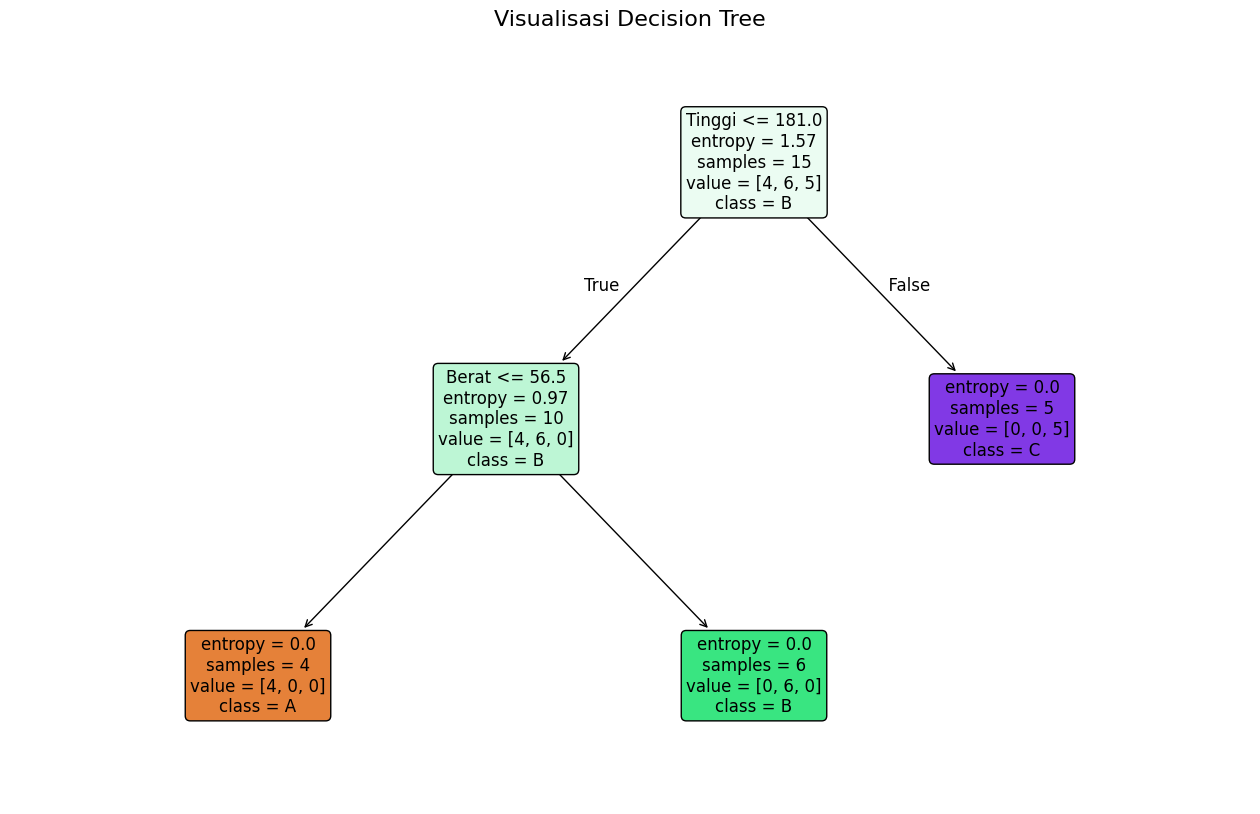

In [7]:
plt.figure(figsize=(16, 10))
tree.plot_tree(
    model,
    feature_names=["Berat", "Tinggi"],
    class_names=model.classes_,
    filled=True,
    rounded=True,
    precision=2,
    fontsize=12
)
plt.title("Visualisasi Decision Tree", fontsize=16)
plt.show()

## Predict 2 data baru

In [33]:
data1 = pd.DataFrame({'Berat' : [57], 'Tinggi': [175]})
predict1 = model.predict(data1)
print(f"hasil dari predict berat = {data1['Berat'].values[0]} dan tinggi {data1['Tinggi'].values[0]} adalah kelas =  {predict1[0]}")

hasil dari predict berat = 57 dan tinggi 175 adalah kelas =  B


In [35]:
data2 = pd.DataFrame({'Berat' : [69], 'Tinggi': [180]})
predict2 = model.predict(data2)
print(f"hasil dari predict berat = {data2['Berat'].values[0]} dan tinggi {data2['Tinggi'].values[0]} adalah kelas =  {predict2[0]}")

hasil dari predict berat = 69 dan tinggi 180 adalah kelas =  B
